In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
# We will declare class after this 
class FinancialIntrument():
    pass

In [4]:
class FinancialIntrument():
    def __init__(self,ticker, start,end):
        self._ticker=ticker
        self.start=start
        self.end=end 
        self.get_data()
        self.log_return()
    # lets add get_data method into it 
    def __repr__(self):
        return F"Financial Intrument ticker={self._ticker}, start={self.start} end={self.end}"
    def get_data(self):
        raw=yf.download( self._ticker, self.start, self.end , multi_level_index=True).Close
        raw.rename(columns={self._ticker : "Price"} , inplace=True)
        self.data=raw
    def log_return(self):
        self.data["log_return"]=np.log(self.data.Price/self.data.Price.shift(periods=1))
        
    def plot(self , kind='ts'):
        self.data.log_return.plot(figsize=(30,8))
        plt.title(f"Return the log_return chart of {self._ticker}")

    def plot_prices(self):
        plt.figure(figsize=(30 , 12))
        plt.plot(self.data.Price)
        plt.title("Plot Prices")
        plt.xlabel('Time series')
        plt.ylabel("Price")
        plt.show()

    def set_ticker(self , ticker=None):
        if ticker is not None:
            self._ticker=ticker
            self.get_data()
            self.log_return()

    def mean_return(self , freq=None):
        if freq is None:
            return self.data.log_return.mean()
        else:
            resampled_price=self.data.price.resample(freq).last()
            resample_price_return=np.log(resampled_price / resampled_price(shift=1))
            return resample_price_return

    def std_dev(self , freq=None):
        if freq is None:
            return self.data.Price.std()
        else:
            resampled_data=self.data.Price.resample(freq)
            resampled_data_return=np.log(resampled_data/resampled_data(shift=1))
            return resampled_data_return

    def annual_return(self):
        mean_return=round(self.data.log_return.mean() * 253, 3)
        risk =round(self.data.Price.std() * np.sqrt(253) , 3)
        return f"The annual return and risk are {mean_return} and {risk}"
        

In [5]:
stock=FinancialIntrument('AAPL' , "2020-01-01" , "2025-01-01")

C:\Users\za220\AppData\Local\Temp\ipykernel_27940\2647056435.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw=yf.download( self._ticker, self.start, self.end , multi_level_index=True).Close
[*********************100%***********************]  1 of 1 completed


In [6]:
stock.annual_return()

'The annual return and risk are 0.249 and 667.58'

In [7]:
stock.data

Ticker,Price,log_return
Date,,
2020-01-02,72.538528,NaN
2020-01-03,71.833298,-0.009770
2020-01-06,72.405678,0.007937
2020-01-07,72.065155,-0.004714
2020-01-08,73.224396,0.015958
...,...,...
2024-12-24,257.286682,0.011413
2024-12-26,258.103729,0.003171
2024-12-27,254.685883,-0.013331


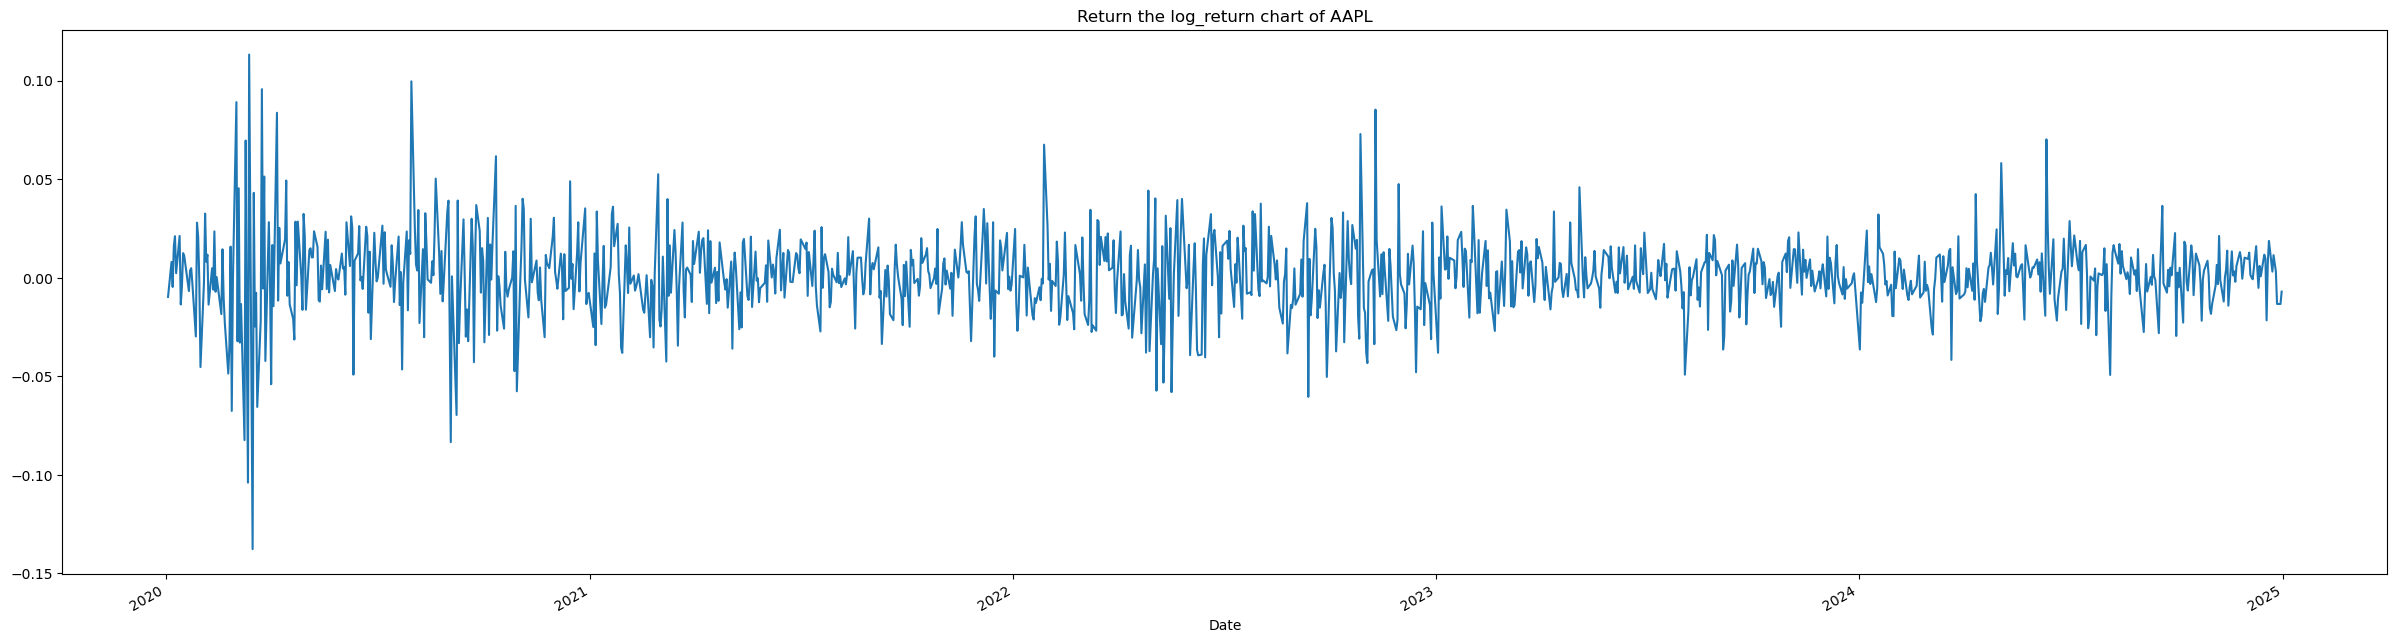

In [8]:
stock.plot()

In [9]:
stock.set_ticker('PNB.NS')

C:\Users\za220\AppData\Local\Temp\ipykernel_27940\2647056435.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw=yf.download( self._ticker, self.start, self.end , multi_level_index=True).Close
[*********************100%***********************]  1 of 1 completed


In [10]:
# Hence u can use this class thanku